In [1]:
import pandas as pd
import numpy as np

import sklearn
import sklearn.model_selection as ms
import sklearn.metrics as mx
import imblearn.over_sampling as imbos

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.mixture import BayesianGaussianMixture

import matplotlib.pyplot as plt
import seaborn as sns

import ModelFunctions

%matplotlib inline

# Niave Bayes Model

In [2]:
X, y = ModelFunctions.import_model_data('/Users/christineegan/AppleM1SentimentAnalysis/data/combined_data/model_data/2021_02_01_ModelData.csv')


[*] Importing model data...

[*] Identifying target...


In [3]:
clf = GaussianNB()

clfs = [clf]
cv = sklearn.model_selection.StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

### Model Results (without SMOTE)


[*] Running basic model...

[*] Generating basic model with TTS for: GaussianNB()
-- Test Size:  0.2

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       0.41      1.00      0.58       293
         1.0       1.00      0.58      0.73       997

    accuracy                           0.67      1290
   macro avg       0.70      0.79      0.66      1290
weighted avg       0.86      0.67      0.70      1290




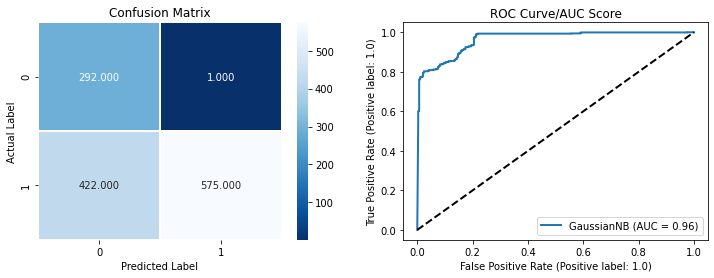



[*] Running basic model...

[*] Generating basic model with TTS for: GaussianNB()
-- Test Size:  0.3

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       0.41      1.00      0.58       448
         1.0       1.00      0.57      0.72      1487

    accuracy                           0.67      1935
   macro avg       0.70      0.78      0.65      1935
weighted avg       0.86      0.67      0.69      1935




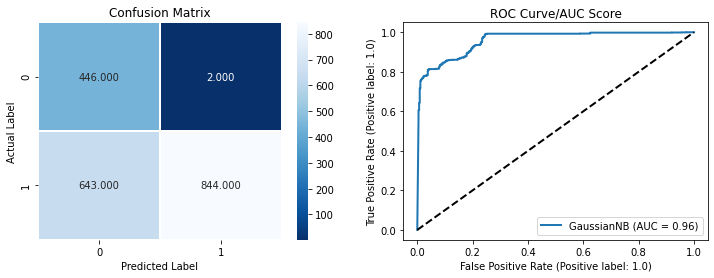



[*] Running basic model...

[*] Generating basic model with TTS for: GaussianNB()
-- Test Size:  0.4

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       0.40      0.99      0.57       593
         1.0       1.00      0.56      0.72      1987

    accuracy                           0.66      2580
   macro avg       0.70      0.78      0.65      2580
weighted avg       0.86      0.66      0.69      2580




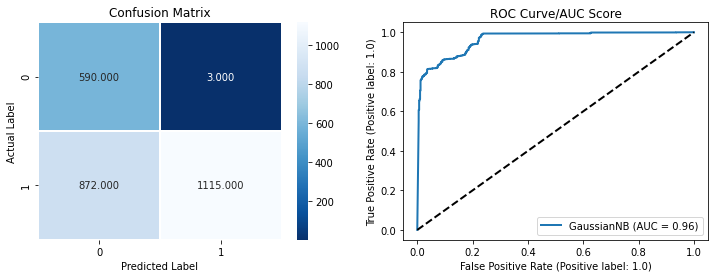



[*] Running cross-val model...


,Accuracy,AUC,Precision,Recall,F1
0,0.665891,0.951922,0.992857,0.565615,0.720674
1,0.645736,0.956606,0.994371,0.538618,0.698748
2,0.672093,0.954843,0.996460,0.572154,0.726921
3,0.686822,0.970761,0.998282,0.590447,0.742018
4,0.699225,0.969393,0.998328,0.606707,0.754741
mean,0.673953,0.960705,0.996060,0.574708,0.728620



[*] Plotting ROC curve...


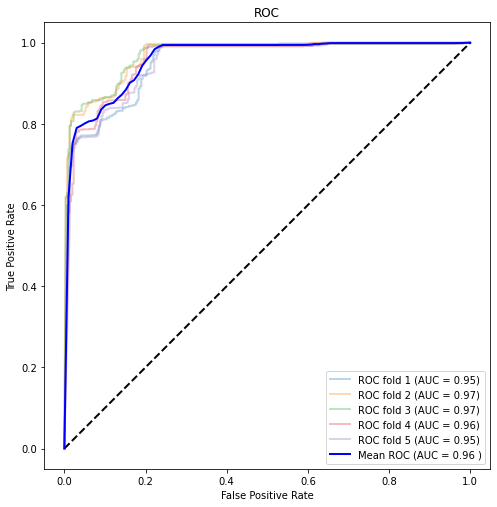


[*] Calculating model scores...


,Model 1
Accuracy,0.673953
AUC,0.960705
Precision,0.996060
Recall,0.574708
F1,0.728620


In [4]:
model_scores = ModelFunctions.model_results(clfs, X, y, cv)

### Model Results (with SMOTE)


[*] Running basic model...

[*] Generating basic model with TTS for: GaussianNB()
-- Test Size:  0.2

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       0.42      1.00      0.59       293
         1.0       1.00      0.59      0.74       997

    accuracy                           0.68      1290
   macro avg       0.71      0.79      0.66      1290
weighted avg       0.87      0.68      0.71      1290




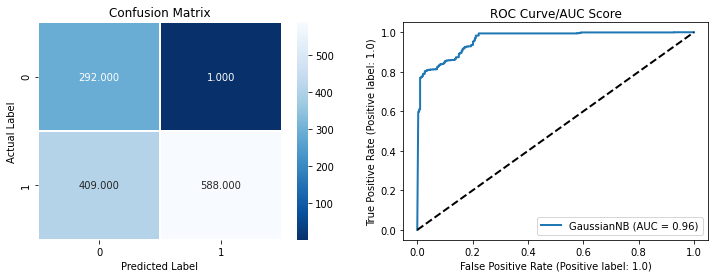



[*] Running basic model...

[*] Generating basic model with TTS for: GaussianNB()
-- Test Size:  0.3

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       0.42      1.00      0.59       448
         1.0       1.00      0.59      0.74      1487

    accuracy                           0.68      1935
   macro avg       0.71      0.79      0.66      1935
weighted avg       0.86      0.68      0.70      1935




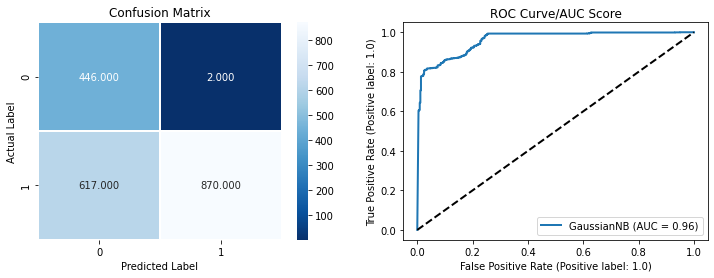



[*] Running basic model...

[*] Generating basic model with TTS for: GaussianNB()
-- Test Size:  0.4

[*] Generating Classification Report....
              precision    recall  f1-score   support

        -1.0       0.42      0.99      0.59       593
         1.0       1.00      0.60      0.75      1987

    accuracy                           0.69      2580
   macro avg       0.71      0.79      0.67      2580
weighted avg       0.86      0.69      0.71      2580




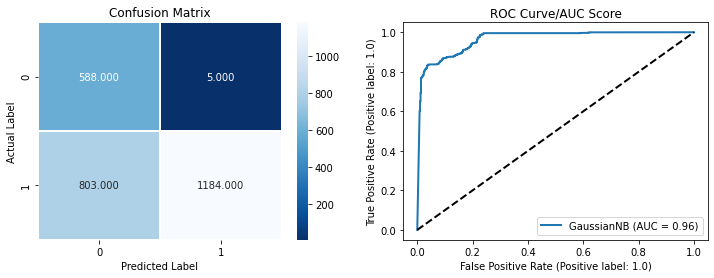



[*] Running cross-val model...

Cross Validation Model with Repeated Stratified K-Fold and SMOTE for: GaussianNB() 



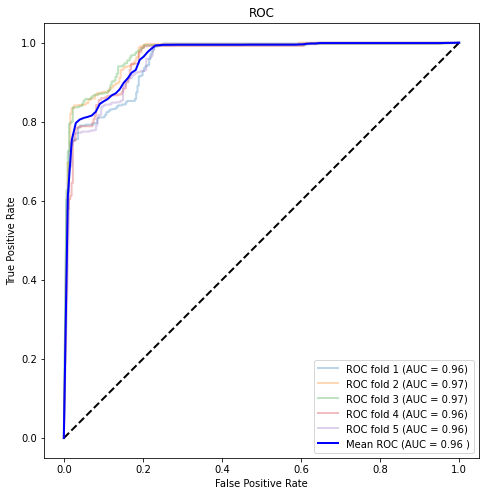


Scores for: GaussianNB()


,Accuracy,AUC,Precision,Recall,F1
0,0.665891,0.951922,0.992857,0.565615,0.720674
1,0.645736,0.956606,0.994371,0.538618,0.698748
2,0.672093,0.954843,0.996460,0.572154,0.726921
3,0.686822,0.970761,0.998282,0.590447,0.742018
4,0.699225,0.969393,0.998328,0.606707,0.754741
mean,0.673953,0.960705,0.996060,0.574708,0.728620



[*] Plotting ROC curve...


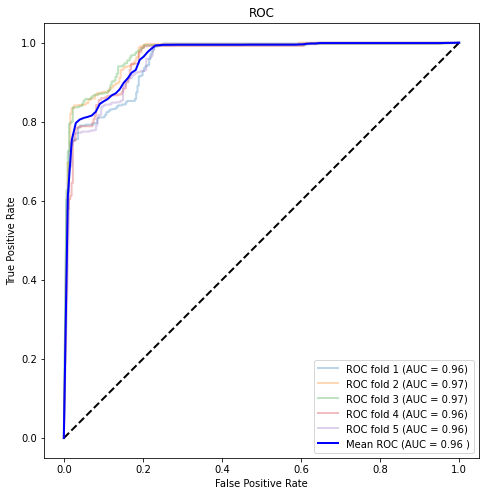


[*] Calculating model scores...


,Model 1 SMOTE
Accuracy,0.673953
AUC,0.960705
Precision,0.996060
Recall,0.574708
F1,0.728620


In [5]:
smote_model_scores = ModelFunctions.model_results_smote(clfs, X, y, cv)

In [6]:
both_scores = pd.concat([model_scores, smote_model_scores], axis=1)
both_scores

,Model 1,Model 1 SMOTE
Accuracy,0.673953,0.673953
AUC,0.960705,0.960705
Precision,0.996060,0.996060
Recall,0.574708,0.574708
F1,0.728620,0.728620
